In [1]:
import os
print(os.getcwd())
os.chdir('D:/handwritten')
print(os.getcwd())

C:\Users\Administrator
D:\handwritten


In [2]:
#Dataset preparation
import os
import xml.etree.ElementTree as ET

# Define the directory containing XML files
directory = "D:/handwritten/xml/"

# Initialize a list to hold all words from all files
all_words = []

# Loop through each XML file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xml"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Load the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Get the handwritten part's text content and word tags
        for word in root.findall(".//handwritten-part/line/word"):
            word_text = word.attrib['text']
            #word_id = word.attrib['id']
            word_id = word.attrib['id']
            u3_path = word_id+'.png'
            if(word_id[8]=="-"):
                u2_path = word_id[:8]+'/'
            else:
                u2_path = word_id[:7]+'/'
            u1_path = word_id[:3]+'/'
            word_path = u1_path+u2_path+u3_path
            all_words.append((word_path, word_text))

# Now 'all_words' contains words from all XML files in the directory


In [6]:
selected_data = all_words[:2]
print(selected_data)

[('a01/a01-000u/a01-000u-00-00.png', 'A'), ('a01/a01-000u/a01-000u-00-01.png', 'MOVE')]


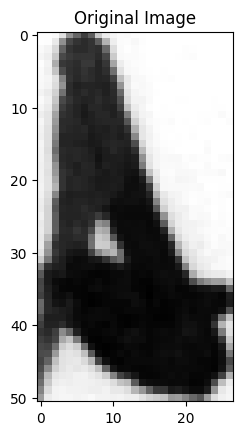

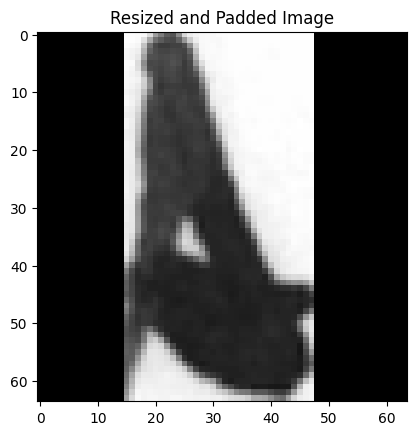

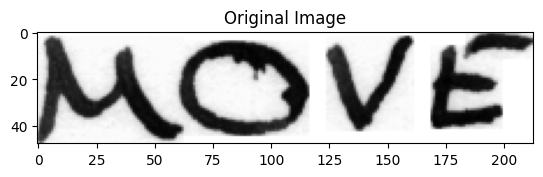

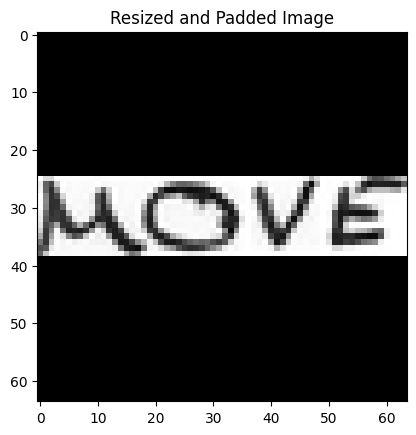

In [9]:
# 等比例缩放！！！！！
# Proportional scaling
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

data = selected_data  

# prepare features and labels
features = []
labels = []

def resize_and_pad(img, desired_size=64):
    # Calculate proportional scaling ratio
    ratio = desired_size / max(img.size)
    new_size = (int(img.size[0] * ratio), int(img.size[1] * ratio))
    img = img.resize(new_size, Image.Resampling.LANCZOS)
    
    # Create a new background canvas
    new_img = Image.new("L", (desired_size, desired_size), "black")
    # Paste the image in the center
    new_img.paste(img, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))
    
    return new_img

for image_path, label in data:
        # Convert to grayscale image
        img = Image.open('words/' + image_path).convert('L')
        # Display the original grayscale image
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')
        plt.show()
        
        # Scale proportionally and fill to specified size
        img = resize_and_pad(img, 64)
        # Display the resized and padded image
        plt.imshow(img, cmap='gray')
        plt.title('Resized and Padded Image')
        plt.show()

        # Convert image to 1D array
        feature = np.array(img).flatten()
        
        # If the image is loaded successfully, add features and labels to the list
        features.append(feature)
        labels.append(label)


# Convert to numpy array
features = np.array(features)
labels = np.array(labels)